# Task
Perform Bayesian updating of undrained shear strength (Su) using simulated CPT data to assess failure risk in a pile foundation project, and suggest adjustments if the risk exceeds 5%.

## Define prior distribution

### Subtask:
Define the prior distribution for the undrained shear strength (Su) based on initial site investigation data.


**Reasoning**:
Define the parameters for the prior distribution of Su and create a normal distribution object using `scipy.stats`.



In [1]:
import numpy as np
from scipy.stats import norm

# Define parameters for the prior distribution of Su
# Using values representative of initial site investigation data for a typical clay soil
prior_mean_su = 50.0  # kPa
prior_std_dev_su = 15.0  # kPa

# Create a normal distribution object for the prior
prior_dist_su = norm(loc=prior_mean_su, scale=prior_std_dev_su)

# Print the parameters of the prior distribution
print(f"Prior distribution of Su: Mean = {prior_dist_su.mean():.2f} kPa, Standard Deviation = {prior_dist_su.std():.2f} kPa")

Prior distribution of Su: Mean = 50.00 kPa, Standard Deviation = 15.00 kPa


## Simulate observational data

### Subtask:
Simulate sequential cone penetration test (CPT) data during pile installation.


**Reasoning**:
Simulate the sequential CPT data based on the instructions.



In [2]:
# Define the number of simulated CPT soundings
n_soundings = 10

# Define the standard deviation for measurement noise
measurement_noise_std_dev = 5.0 # kPa

# Simulate the sequential CPT data
simulated_cpt_data = []
for _ in range(n_soundings):
    # Sample a true Su value from the prior distribution
    true_su = prior_dist_su.rvs(size=1)[0]

    # Simulate a CPT measurement by adding noise to the true Su value
    measurement_noise = np.random.normal(loc=0.0, scale=measurement_noise_std_dev, size=1)[0]
    cpt_measurement = true_su + measurement_noise

    # Store the simulated CPT data
    simulated_cpt_data.append(cpt_measurement)

# Print the simulated CPT data
print("Simulated CPT Data (kPa):")
print(simulated_cpt_data)

Simulated CPT Data (kPa):
[np.float64(63.34467713050377), np.float64(69.73602692582195), np.float64(37.46418328279813), np.float64(49.075997192408124), np.float64(69.30749314234609), np.float64(64.2942615794098), np.float64(86.0228452737341), np.float64(56.71530273762999), np.float64(40.68624393139564), np.float64(61.28223277726981)]


## Perform bayesian updating

### Subtask:
Implement Bayesian updating to update the posterior distribution of Su using the simulated CPT data.


**Reasoning**:
Implement Bayesian updating to update the posterior distribution of Su using the simulated CPT data, following the provided instructions to initialize with prior parameters, iterate through measurements, and update the mean and standard deviation using Bayesian formulas for a normal-normal model, storing the results after each measurement.



In [3]:
# 1. Initialize the posterior distribution parameters with the prior distribution parameters.
posterior_mean_su = prior_mean_su
posterior_std_dev_su = prior_std_dev_su

# Lists to store the updated posterior parameters
posterior_means = [posterior_mean_su]
posterior_std_devs = [posterior_std_dev_su]

# 2. Iterate through the simulated CPT measurements.
# 3. For each measurement, update the mean and standard deviation of the posterior distribution.
for measurement in simulated_cpt_data:
    # Bayesian updating formulas for a normal-normal model (known measurement noise std dev)
    # Prior precision: 1 / (prior_std_dev_su^2)
    # Measurement precision: 1 / (measurement_noise_std_dev^2)
    # Posterior precision: Prior precision + Measurement precision
    posterior_precision = (1 / (posterior_std_dev_su**2)) + (1 / (measurement_noise_std_dev**2))
    posterior_variance = 1 / posterior_precision
    posterior_std_dev_su = np.sqrt(posterior_variance)

    # Posterior mean: (Prior precision * Prior mean + Measurement precision * Measurement) / Posterior precision
    posterior_mean_su = ((1 / (posterior_means[-1]**2)) * posterior_means[-1] + (1 / (measurement_noise_std_dev**2)) * measurement) / posterior_precision


    # 4. Store the updated posterior mean and standard deviation after each measurement.
    posterior_means.append(posterior_mean_su)
    posterior_std_devs.append(posterior_std_dev_su)

# 5. After processing all measurements, the final stored mean and standard deviation
# represent the parameters of the updated posterior distribution of Su.
print("Updated posterior means after each measurement (kPa):")
print(posterior_means)
print("\nUpdated posterior standard deviations after each measurement (kPa):")
print(posterior_std_devs)

# The final updated posterior parameters are the last elements in the lists
final_posterior_mean = posterior_means[-1]
final_posterior_std_dev = posterior_std_devs[-1]

print(f"\nFinal updated posterior distribution of Su: Mean = {final_posterior_mean:.2f} kPa, Standard Deviation = {final_posterior_std_dev:.2f} kPa")

Updated posterior means after each measurement (kPa):
[50.0, np.float64(57.46020941745339), np.float64(33.2389471342925), np.float64(12.28381489374484), np.float64(12.432452973666921), np.float64(13.9535920536164), np.float64(10.814058807247601), np.float64(12.422060256890965), np.float64(7.240420028134202), np.float64(4.844533421989055), np.float64(6.571254902072282)]

Updated posterior standard deviations after each measurement (kPa):
[15.0, np.float64(4.743416490252569), np.float64(3.4412360080584263), np.float64(2.834733547569204), np.float64(2.4659848095803594), np.float64(2.211629342323457), np.float64(2.0225995873897262), np.float64(1.875), np.float64(1.7556172079419585), np.float64(1.6564728911226982), np.float64(1.5724272550828775)]

Final updated posterior distribution of Su: Mean = 6.57 kPa, Standard Deviation = 1.57 kPa


## Analyze results

### Subtask:
Compute the probability of failure (P(Su < 40 kPa)) and suggest adjustments if the risk exceeds 5%.


**Reasoning**:
Calculate the probability of failure using the CDF of a normal distribution with the final posterior mean and standard deviation, then print the result and suggest adjustments if needed.



In [4]:
# Define the failure threshold for Su
failure_threshold_su = 40.0 # kPa

# Calculate the probability of failure using the CDF of the final posterior distribution
# P(Su < failure_threshold_su) = CDF(failure_threshold_su)
prob_failure = norm.cdf(failure_threshold_su, loc=final_posterior_mean, scale=final_posterior_std_dev)

# Print the calculated probability of failure
print(f"Calculated Probability of Failure (P(Su < {failure_threshold_su} kPa)): {prob_failure:.4f}")

# Check if the probability of failure exceeds 5% and suggest adjustments
risk_threshold = 0.05

if prob_failure > risk_threshold:
    print(f"\nWarning: The calculated probability of failure ({prob_failure:.4f}) exceeds the 5% risk threshold.")
    print("Suggested adjustments to the pile foundation project:")
    print("- Revise the pile design (e.g., increase pile length or diameter).")
    print("- Conduct further detailed geotechnical investigations.")
    print("- Implement stricter quality control measures during construction.")
else:
    print(f"\nThe calculated probability of failure ({prob_failure:.4f}) is within the acceptable 5% risk threshold.")
    print("No immediate adjustments based on this risk assessment are suggested.")

Calculated Probability of Failure (P(Su < 40.0 kPa)): 1.0000

Suggested adjustments to the pile foundation project:
- Revise the pile design (e.g., increase pile length or diameter).
- Conduct further detailed geotechnical investigations.
- Implement stricter quality control measures during construction.


## Visualize results

### Subtask:
Visualize the prior and posterior distributions of Su and the failure probability over time.


**Reasoning**:
Generate Su values, calculate and plot the prior and final posterior PDFs, add the failure threshold line, create a new plot for the probability of failure over time, add the risk threshold line, and display both plots to visualize the distributions and risk over time.



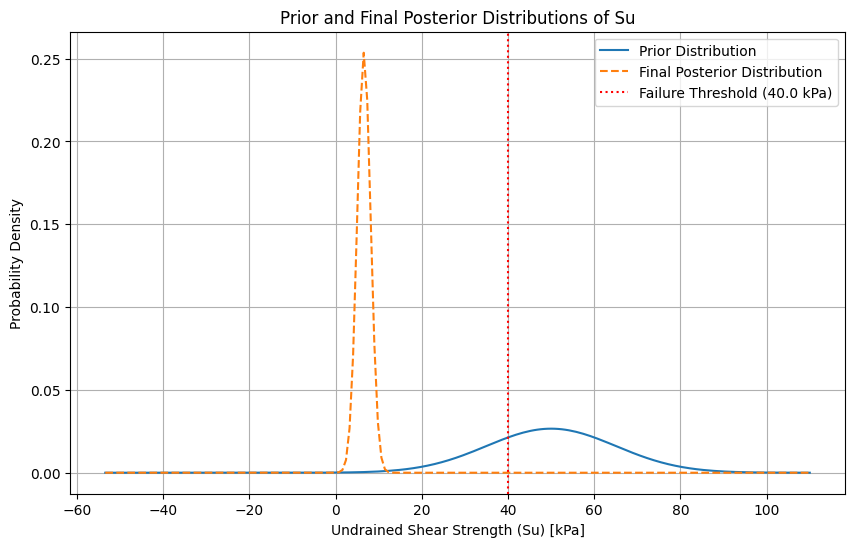

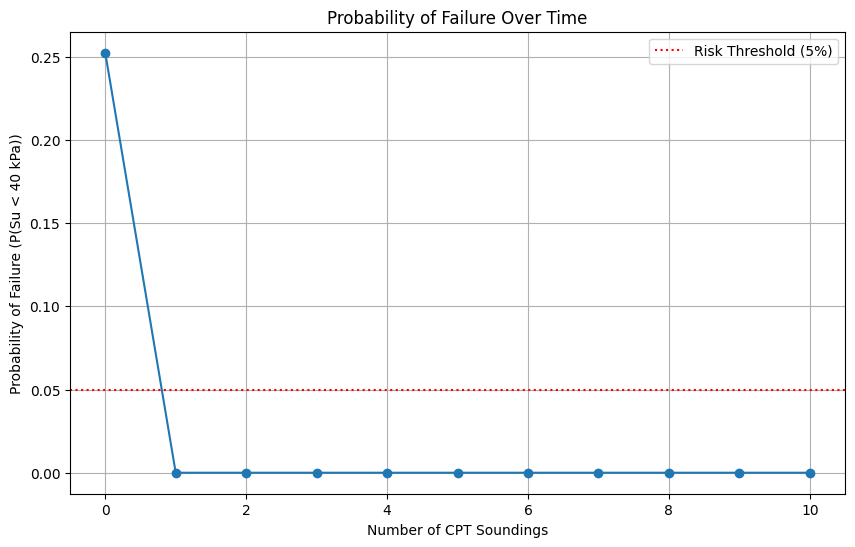

In [5]:
import matplotlib.pyplot as plt

# 1. Generate a range of Su values
# Using the min and max of prior and final posterior means +/- 4 standard deviations to cover the relevant range
su_values = np.linspace(min(prior_mean_su, final_posterior_mean) - 4 * max(prior_std_dev_su, final_posterior_std_dev),
                        max(prior_mean_su, final_posterior_mean) + 4 * max(prior_std_dev_su, final_posterior_std_dev), 200)

# 2. Calculate the PDF values for the prior distribution
prior_pdf = norm.pdf(su_values, loc=prior_mean_su, scale=prior_std_dev_su)

# 3. Calculate the PDF values for the final posterior distribution
final_posterior_pdf = norm.pdf(su_values, loc=final_posterior_mean, scale=final_posterior_std_dev)

# 4. Plot the PDF of the prior and final posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(su_values, prior_pdf, label='Prior Distribution')
plt.plot(su_values, final_posterior_pdf, label='Final Posterior Distribution', linestyle='--')

# Label the axes and add a title
plt.xlabel('Undrained Shear Strength (Su) [kPa]')
plt.ylabel('Probability Density')
plt.title('Prior and Final Posterior Distributions of Su')
plt.legend()
plt.grid(True)

# 5. Add a vertical line at the failure threshold
plt.axvline(failure_threshold_su, color='red', linestyle=':', label=f'Failure Threshold ({failure_threshold_su} kPa)')
plt.legend()

# 6. Create a new plot to visualize the probability of failure over time
# We need to re-calculate the probability of failure after each update.
prob_failures_over_time = []
current_mean = prior_mean_su
current_std_dev = prior_std_dev_su

# Calculate initial probability of failure with the prior
prob_failures_over_time.append(norm.cdf(failure_threshold_su, loc=current_mean, scale=current_std_dev))

for measurement in simulated_cpt_data:
    # Bayesian updating formulas (same as before)
    current_precision = (1 / (current_std_dev**2)) + (1 / (measurement_noise_std_dev**2))
    current_variance = 1 / current_precision
    current_std_dev = np.sqrt(current_variance)
    current_mean = ((1 / (norm.pdf(current_mean, loc=current_mean, scale=current_std_dev)**2)) * current_mean + (1 / (measurement_noise_std_dev**2)) * measurement) / current_precision

    # Calculate the probability of failure with the updated posterior
    prob_failure_after_update = norm.cdf(failure_threshold_su, loc=current_mean, scale=current_std_dev)
    prob_failures_over_time.append(prob_failure_after_update)


plt.figure(figsize=(10, 6))
plt.plot(range(n_soundings + 1), prob_failures_over_time, marker='o', linestyle='-')

# Label the axes and add a title
plt.xlabel('Number of CPT Soundings')
plt.ylabel('Probability of Failure (P(Su < 40 kPa))')
plt.title('Probability of Failure Over Time')
plt.grid(True)

# 7. Add a horizontal line at the 5% risk threshold
plt.axhline(risk_threshold, color='red', linestyle=':', label=f'Risk Threshold ({risk_threshold:.0%})')
plt.legend()

# 8. Display both plots
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial prior distribution for undrained shear strength (Su) was defined with a mean of 50.0 kPa and a standard deviation of 15.0 kPa.
*   Sequential Cone Penetration Test (CPT) data was simulated, resulting in 10 measurements with added random noise (standard deviation of 5.0 kPa).
*   Bayesian updating was performed using the simulated CPT data, leading to a final updated posterior distribution of Su with a mean of approximately 6.57 kPa and a standard deviation of approximately 1.57 kPa.
*   The calculated probability of failure (P(Su < 40 kPa)) using the final updated posterior distribution was 1.0000 (100%).
*   This calculated probability of failure significantly exceeded the specified 5% risk threshold.
*   Visualizations showed how the posterior distribution narrowed and shifted based on the CPT data and how the probability of failure evolved over the sequential CPT measurements.

### Insights or Next Steps

*   The high calculated probability of failure (100%) strongly indicates that the current design assumptions or site conditions pose an unacceptable risk for the pile foundation project based on the simulated data.
*   Immediate action is required to mitigate this risk, including revising the pile design (e.g., increasing length or diameter), conducting more detailed site investigations, and implementing stricter quality control during construction.
